In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

[&larr; Back to Index](index.html)

# Autocorrelation

The [autocorrelation](http://en.wikipedia.org/wiki/Autocorrelation) of a signal describes the similarity of a signal against a time-shifted version of itself. For a signal $x$, the autocorrelation $r$ is:

$$ r(k) = \sum_n x(n) x(n-k) $$

In this equation, $k$ is often called the **lag** parameter. $r(k)$ is maximized at $k = 0$ and is symmetric about $k$.

The autocorrelation is useful for finding repeated patterns in a signal. For example, at short lags, the autocorrelation can tell us something about the signal's fundamental frequency. For longer lags, the autocorrelation may tell us something about the tempo of a musical signal.

Let's load a file:

In [2]:
x, sr = librosa.load('audio/c_strum.wav')
ipd.Audio(x, rate=sr)

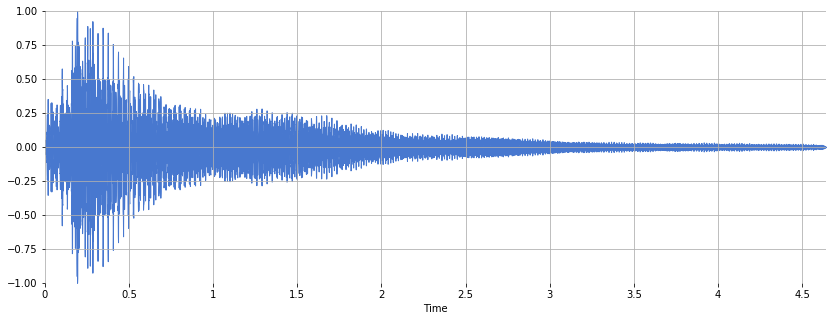

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

### `numpy.correlate`

There are two ways we can compute the autocorrelation in Python. The first method is [`numpy.correlate`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html):

In [4]:
# Because the autocorrelation produces a symmetric signal, we only care about the "right half".
r = numpy.correlate(x, x, mode='full')[len(x)-1:]
print(x.shape, r.shape)

(102400,) (102400,)


Plot the autocorrelation:

(0, 10000)

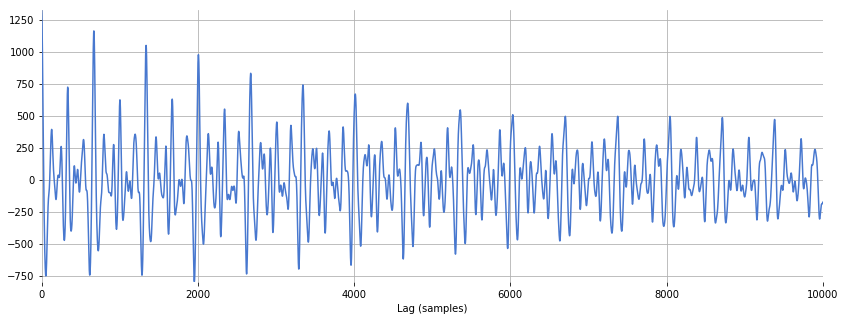

In [5]:
plt.figure(figsize=(14, 5))
plt.plot(r[:10000])
plt.xlabel('Lag (samples)')
plt.xlim(0, 10000)

### `librosa.autocorrelate`

The second method is [`librosa.autocorrelate`](http://bmcfee.github.io/librosa/generated/librosa.core.autocorrelate.html#librosa.core.autocorrelate):

In [6]:
r = librosa.autocorrelate(x, max_size=10000)
print(r.shape)

(10000,)


(0, 10000)

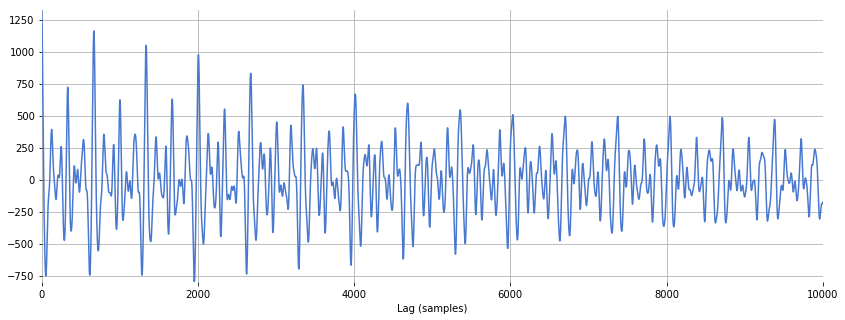

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel('Lag (samples)')
plt.xlim(0, 10000)

`librosa.autocorrelate` conveniently only keeps one half of the autocorrelation function, since the autocorrelation is symmetric. Also, the `max_size` parameter prevents unnecessary calculations.

## Pitch Estimation

The autocorrelation is used to find repeated patterns within a signal. For musical signals, a repeated pattern can correspond to a pitch period. We can therefore use the autocorrelation function to estimate the pitch in a musical signal.

In [8]:
x, sr = librosa.load('audio/oboe_c6.wav')
ipd.Audio(x, rate=sr)

Compute and plot the autocorrelation:

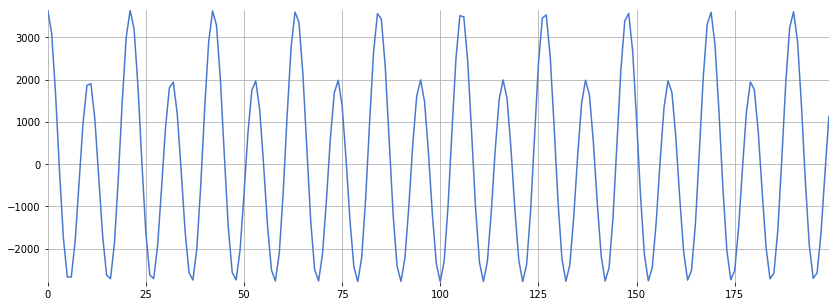

In [9]:
r = librosa.autocorrelate(x, max_size=5000)
plt.figure(figsize=(14, 5))
plt.plot(r[:200])

The autocorrelation always has a maximum at zero, i.e. zero lag. We want to identify the maximum outside of the peak centered at zero. Therefore, we might choose only to search within a range of reasonable pitches:

In [10]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi
t_hi = sr/f_lo

In [11]:
print(f_lo, f_hi)
print(t_lo, t_hi)

16.351597831287414 8372.018089619156
2.633773573344376 1348.4920695523206


Set invalid pitch candidates to zero:

In [12]:
r[:int(t_lo)] = 0
r[int(t_hi):] = 0

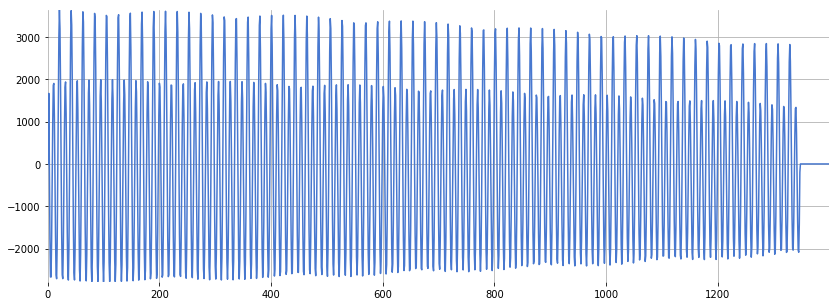

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(r[:1400])

Find the location of the maximum:

In [14]:
t_max = r.argmax()
print(t_max)

21


Finally, estimate the pitch in Hertz:

In [15]:
float(sr)/t_max

1050.0

Indeed, that is very close to the true frequency of C6:

In [16]:
librosa.midi_to_hz(84)

1046.5022612023945

## Tempo Estimation

When perfomed upon a novelty function, an autocorrelation can provide some notion of tempo.

For more, see the notebook **Tempo Estimation**.

[&larr; Back to Index](index.html)